In [20]:
import wfdb
import numpy as np
import os

from plot import plot_extracted_segment

In [21]:
record_name = 'qt-database/sel100'  # Include the directory in the record name
annotation_ext='q1c'

In [22]:
# Load the record from local files - set pn_dir to None for local files
signals, fields = wfdb.rdsamp(record_name, pn_dir=None)

# Load annotations from local files
ann = wfdb.rdann(record_name, annotation_ext, pn_dir=None)

# Find the first and last annotation sample points
first_ann_sample = ann.sample[0]
last_ann_sample = ann.sample[-1]

print(f"First annotation at sample: {first_ann_sample}")
print(f"Last annotation at sample: {last_ann_sample}")
print(f"Extracted segment length: {last_ann_sample - first_ann_sample + 1} samples")
print(f"Extraction timespan: {(last_ann_sample - first_ann_sample + 1) / fields['fs']:.2f} seconds")

First annotation at sample: 150272
Last annotation at sample: 156196
Extracted segment length: 5925 samples
Extraction timespan: 23.70 seconds


In [23]:
# Extract only the annotated region of the signal
signals_annotated = signals[first_ann_sample:last_ann_sample+1, :]

# Manually filter and adjust annotations
adjusted_samples = []
adjusted_symbols = []

# Process each annotation and keep only those in our range
for i in range(len(ann.sample)):
    if first_ann_sample <= ann.sample[i] <= last_ann_sample:
        adjusted_samples.append(ann.sample[i] - first_ann_sample)
        adjusted_symbols.append(ann.symbol[i])

# Convert to numpy arrays
adjusted_samples = np.array(adjusted_samples)
adjusted_symbols = np.array(adjusted_symbols)

# Create the adjusted annotation object
ann_adjusted = wfdb.Annotation(
    record_name=record_name,
    extension=annotation_ext,
    sample=adjusted_samples,
    symbol=adjusted_symbols,
    aux_note=None,  # We're skipping aux_note for simplicity
    chan=ann.chan,
    fs=ann.fs,
    label_store=None,  # We're skipping label_store for simplicity
    description=f"Adjusted annotations for {record_name}"
)

print(f"Adjusted annotations: {len(adjusted_samples)} found")
print(f"Adjusted symbols: {adjusted_symbols}")

Adjusted annotations: 240 found
Adjusted symbols: ['(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p'
 ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '('
 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')'
 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')'
 '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p'
 ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '('
 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')'
 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')'
 '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p'
 ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '('
 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')'
 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')'
 '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p' ')' '(' 'N' ')' 't' ')' '(' 'p'
 

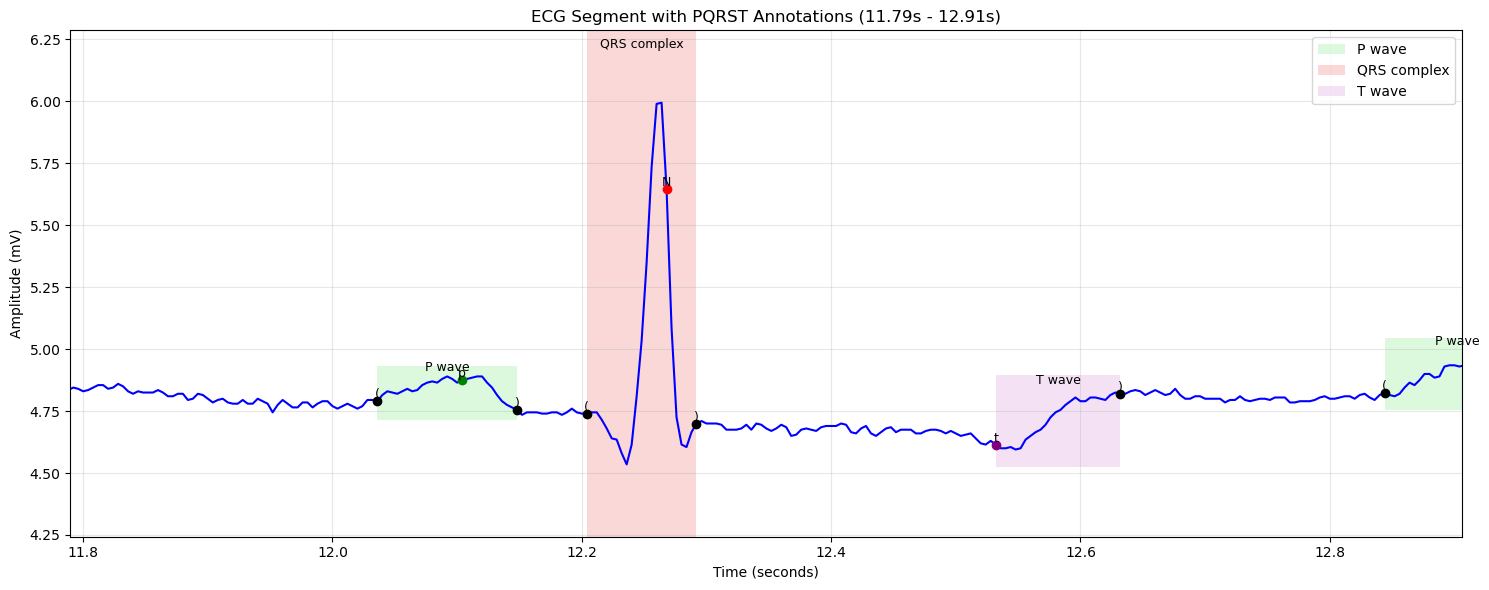

In [24]:
# Find all R peaks
r_peak_indices = [i for i, symbol in enumerate(ann_adjusted.symbol) if symbol == 'N']
r_peak_times = [ann_adjusted.sample[i] / fields['fs'] for i in r_peak_indices]

# Calculate the average RR interval
rr_intervals = [r_peak_times[i+1] - r_peak_times[i] for i in range(len(r_peak_times)-1)]
avg_rr_interval = sum(rr_intervals) / len(rr_intervals)

# Center on a middle R peak and show 60% of an RR interval before and 80% after
middle_r_index = len(r_peak_times) // 2
focused_start = r_peak_times[middle_r_index] - (avg_rr_interval * 0.6)
focused_end = r_peak_times[middle_r_index] + (avg_rr_interval * 0.8)

# Plot a single beat with detailed view
plot_extracted_segment(signals_annotated, fields, ann_adjusted, time_window=(focused_start, focused_end))